In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
df = pd.read_csv('sample_data/iris.csv')

In [ ]:
# Let's see how the data looks like
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# Now, what's the shape of the data?
df.shape

(150, 5)

Let's now split the data into train and test dataset using SKLEARN

In [ ]:
# importing the sklearn library

from sklearn.model_selection import train_test_split

In [ ]:
# get the X and y i.e. features and labels out
# features = df.iloc[:,:3].values
# labels = df.iloc[:,-1].values
features = df.drop('target',axis=1).values
labels = df['target'].values

In [ ]:
# Now let's apply the split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2, random_state=33)

In [ ]:
# Now we would need to convert the array to tensors we can do it like this
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
# converting the labels now
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Let's now split the data into train and test dataset using PYTORCH

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# get the X and y i.e. features and labels out
features = df.iloc[:,:3].values
labels = df.iloc[:,-1].values

In [ ]:
# We're now splitting using the built in Pytorch Splitter
iris_dataset_train_test = TensorDataset(torch.FloatTensor(features), torch.LongTensor(labels))

# We can itterate in this object like this
## for row in iris_dataset_train_test:
##  print(row)

In [ ]:
# Converting the dataset to loader and spliting into batchesto train a network
iris_loader = DataLoader(iris_dataset_train_test, batch_size=50, shuffle=True)

**Creating a Neural Network now**

In [ ]:
class Model(nn.Module):

  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    # how many layers are there?
    super().__init__()

    # First fully connected layer, input layer --> h1
    self.fc1 = nn.Linear(in_features,h1) 

    # Second fully connected layer, h1 --> h2
    self.fc2 = nn.Linear(h1, h2) 

    # The output layer, h2 --> output
    self.out = nn.Linear(h2, out_features) 

    # input layer (4 features, iris dataset) --> h1 (N) --> h2 (N) --> output (3 classes)
    pass

  def forward(self, x):

    # all the Fully Connected layers would now be passed through
    # an activation function
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [ ]:
# Let's now initialize out model
model = Model()

In [ ]:
# We alreay have dataset splitted in X_train, X_test and y_train, y_test
# we'll simple now code to analyze loss

criterion = nn.CrossEntropyLoss()

# Choosing the optimizer now -> Adam

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
# Let us now train the model

# step 1 : Setting the epochs - the number of times the model will itterate the dataset
epochs = 100
losses = []

# step 2 : Loop for each epoch
for i in range(epochs):

  # Step 3 : Move forward in the network
  y_pred = model.forward(X_train)

  # Step 4 : After the prediction happen, let's now calculate the loss
  loss = criterion(y_pred, y_train)
  losses.append(loss)

  # print the epoch and loss
  print(f'epoch {i} loss is {loss}')

  # Step 5 : Back propogation
  
  ## resetting the gradients
  optimizer.zero_grad()
  
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'Epochs')

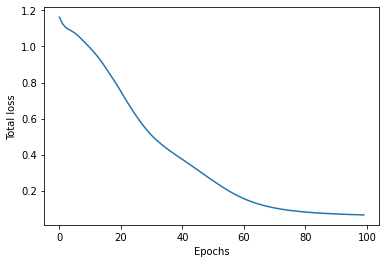

In [ ]:
# So the training is done, let's now plot the losses
plt.plot(range(epochs), losses)
plt.ylabel("Total loss")
plt.xlabel("Epochs")

In [ ]:
# So everything is done, we're now evaluating the model
# first we'll turn off the grad 

with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(f'The loss is {loss}')

The loss is 0.06445859372615814


The loss on training and test set are near about same, so our model is neither overfitting or underfitting and is perfect

In [ ]:
# Let's now see what's the accuracy of the model

# To do so, we'll get the value of the correct prediction and the incorrect predictions

correct = 0

with torch.no_grad():

  # looping through the test set for getting the value
  for i, data in enumerate(X_test):

    y_val = model.forward(data)

    if y_val.argmax().item() == y_test[i]:
      correct += 1

  # so finally we have
  print(f"We got {correct} corrects out of {len(y_test)}")

  # so accuracy of the model is 
  accuracy = (correct / len(y_test)) * 100

  print(f'Accuracy of the model is {accuracy}%')

We got 29 corrects out of 30
Accuracy of the model is 96.66666666666667%


In [ ]:
# Now let's save the model's state (learned weights and biases)
torch.save(model.state_dict(),'my_iris_model_state.pt')

# Now let's save whole model
torch.save(model,'my_iris_model.pt')

In [ ]:
# In order to load a saved model's state
new_model_withstate = Model()
new_model_withstate.load_state_dict(torch.load('my_iris_model_state.pt'))
new_model_withstate.eval()

# In order to load a saved model
new_model = torch.load('my_iris_model.pt')
new_model.eval()

Predict the new Flower


In [ ]:
# Let's set the dimension of the new flower
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

In [ ]:
# Classify the new flower
with torch.no_grad():
  pred = model(mystery_iris)
  print(pred.argmax().item())

0
